In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.style.use("./data/d4sci.mplstyle")

In [3]:
#gdp=pd.read_csv("C:/Users/w/Desktop/time/data/d4sci.mplstyle")

Text(0, 0.5, 'Passengers')

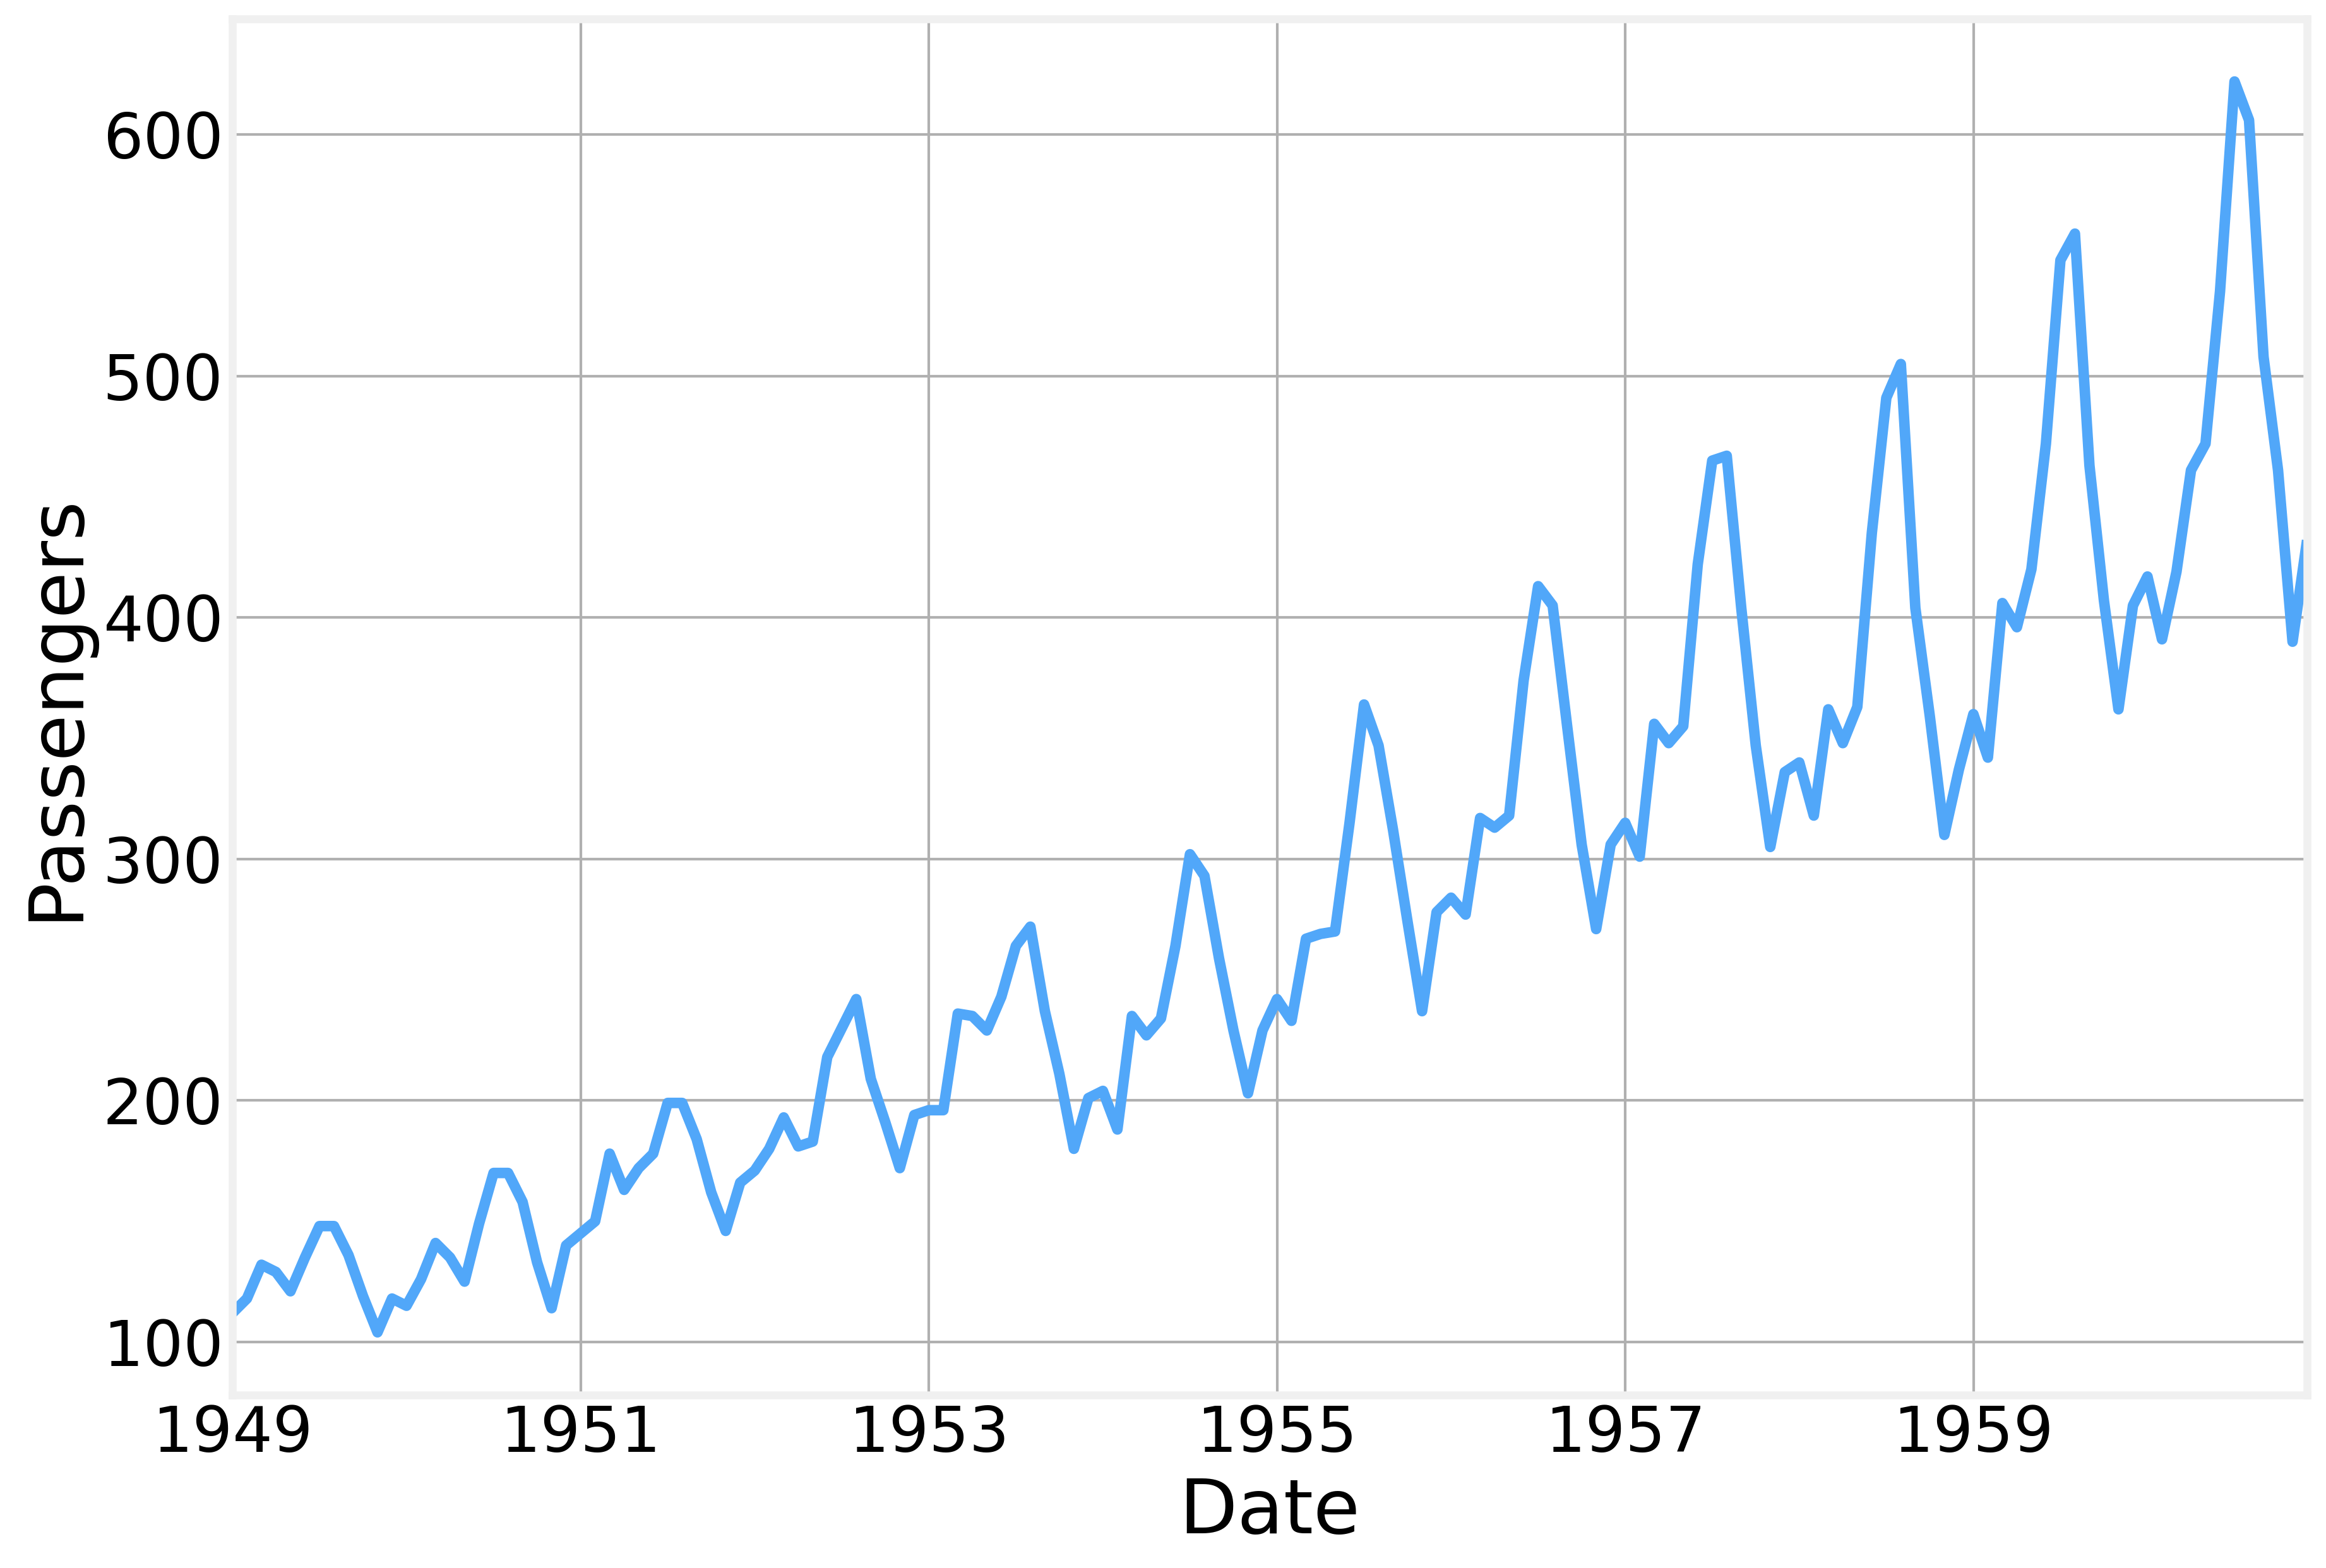

In [4]:
air=pd.read_csv("./data/international-airline-passengers.csv",sep=";")

air['Month']=pd.to_datetime(air['Month']+'-01')
air.set_index("Month",inplace=True)

ax=air.plot(y="Passengers",legend=False)
ax.set_xlabel("Date")
ax.set_ylabel("Passengers")

In [5]:
def running_average(x, order):
    index=x.index
    values=x.values
    current=x.values[:order].sum()
    running=[]
    for i in range(order,x.shape[0]):
        current+=values[i]
        current-=values[i-order]
        running.append(current/order)
      
    run=x.iloc[order:].copy()
    run=np.array(running)
      
    final=x.copy()[order:]
    final.iloc[:,0]=run
    return final

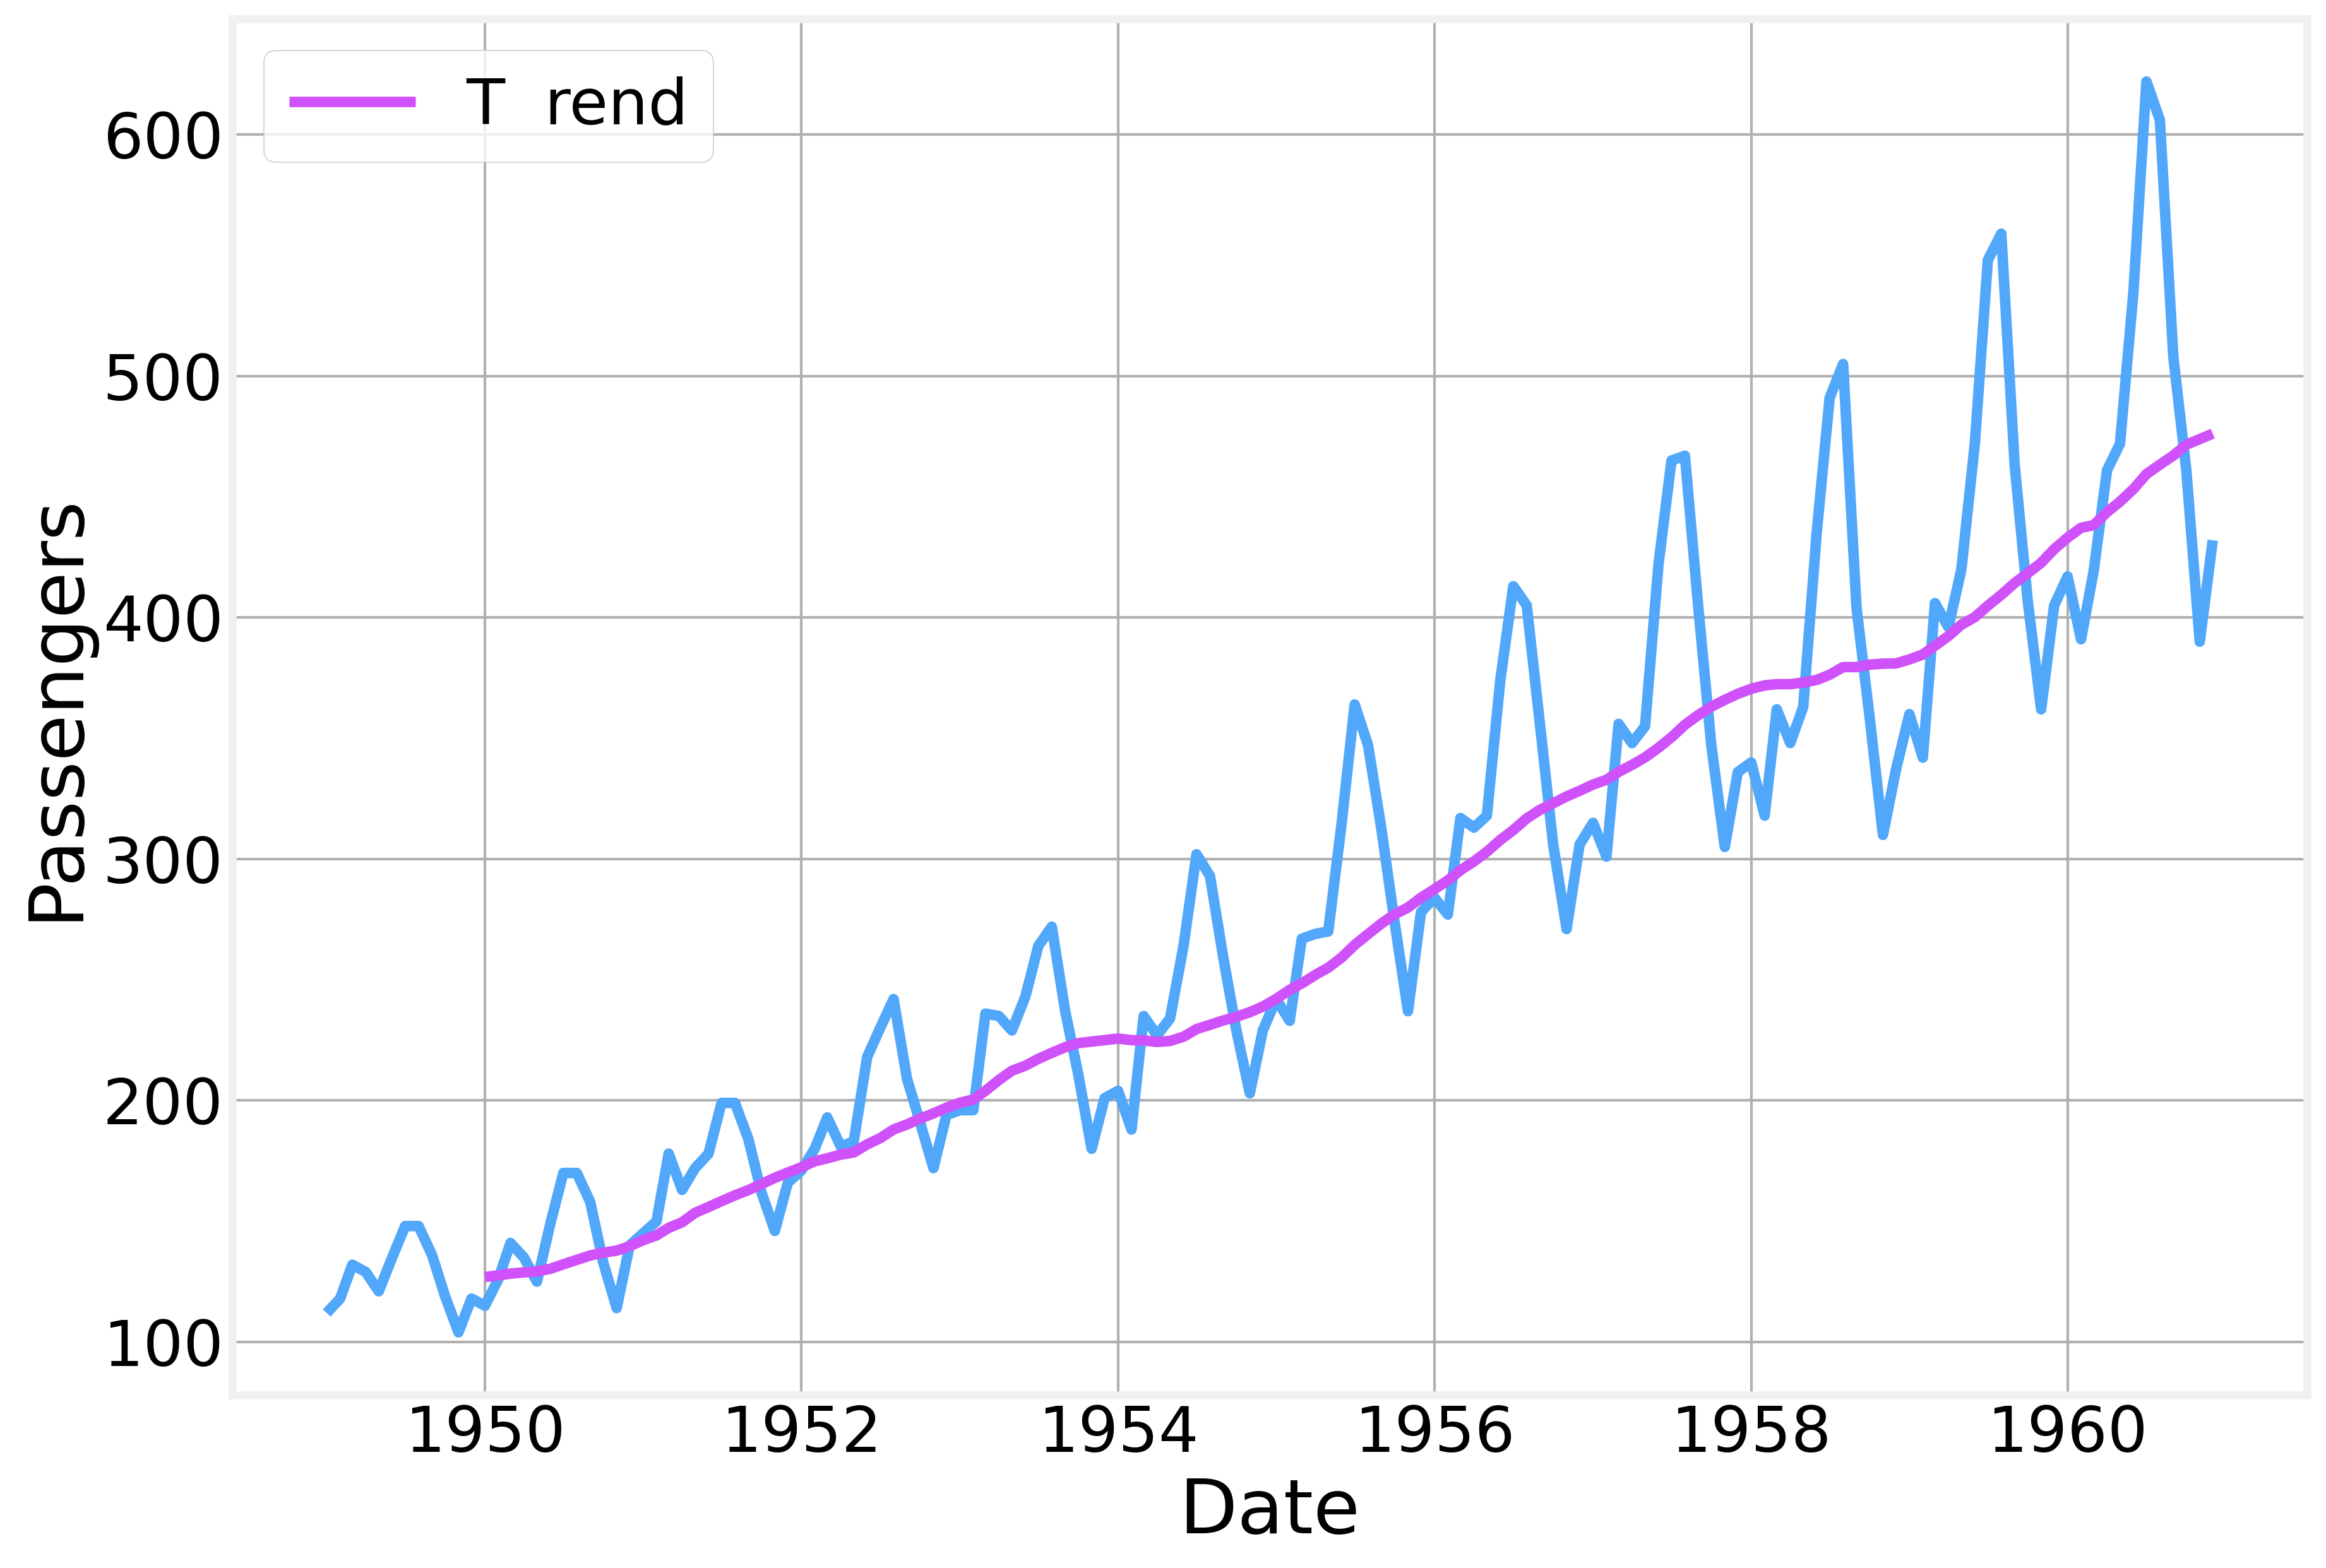

In [6]:
trend=running_average(air,12)
fig,ax=plt.subplots(1,1)
ax.plot(air.index,air["Passengers"])
ax.set_xlabel("Date")
ax.set_ylabel("Passengers")
ax.plot(air.index[12:],trend,label="T  rend")
ax.legend()

In [7]:
detrended = air.iloc[12:].div(trend)

Text(0, 0.5, 'Detrended value')

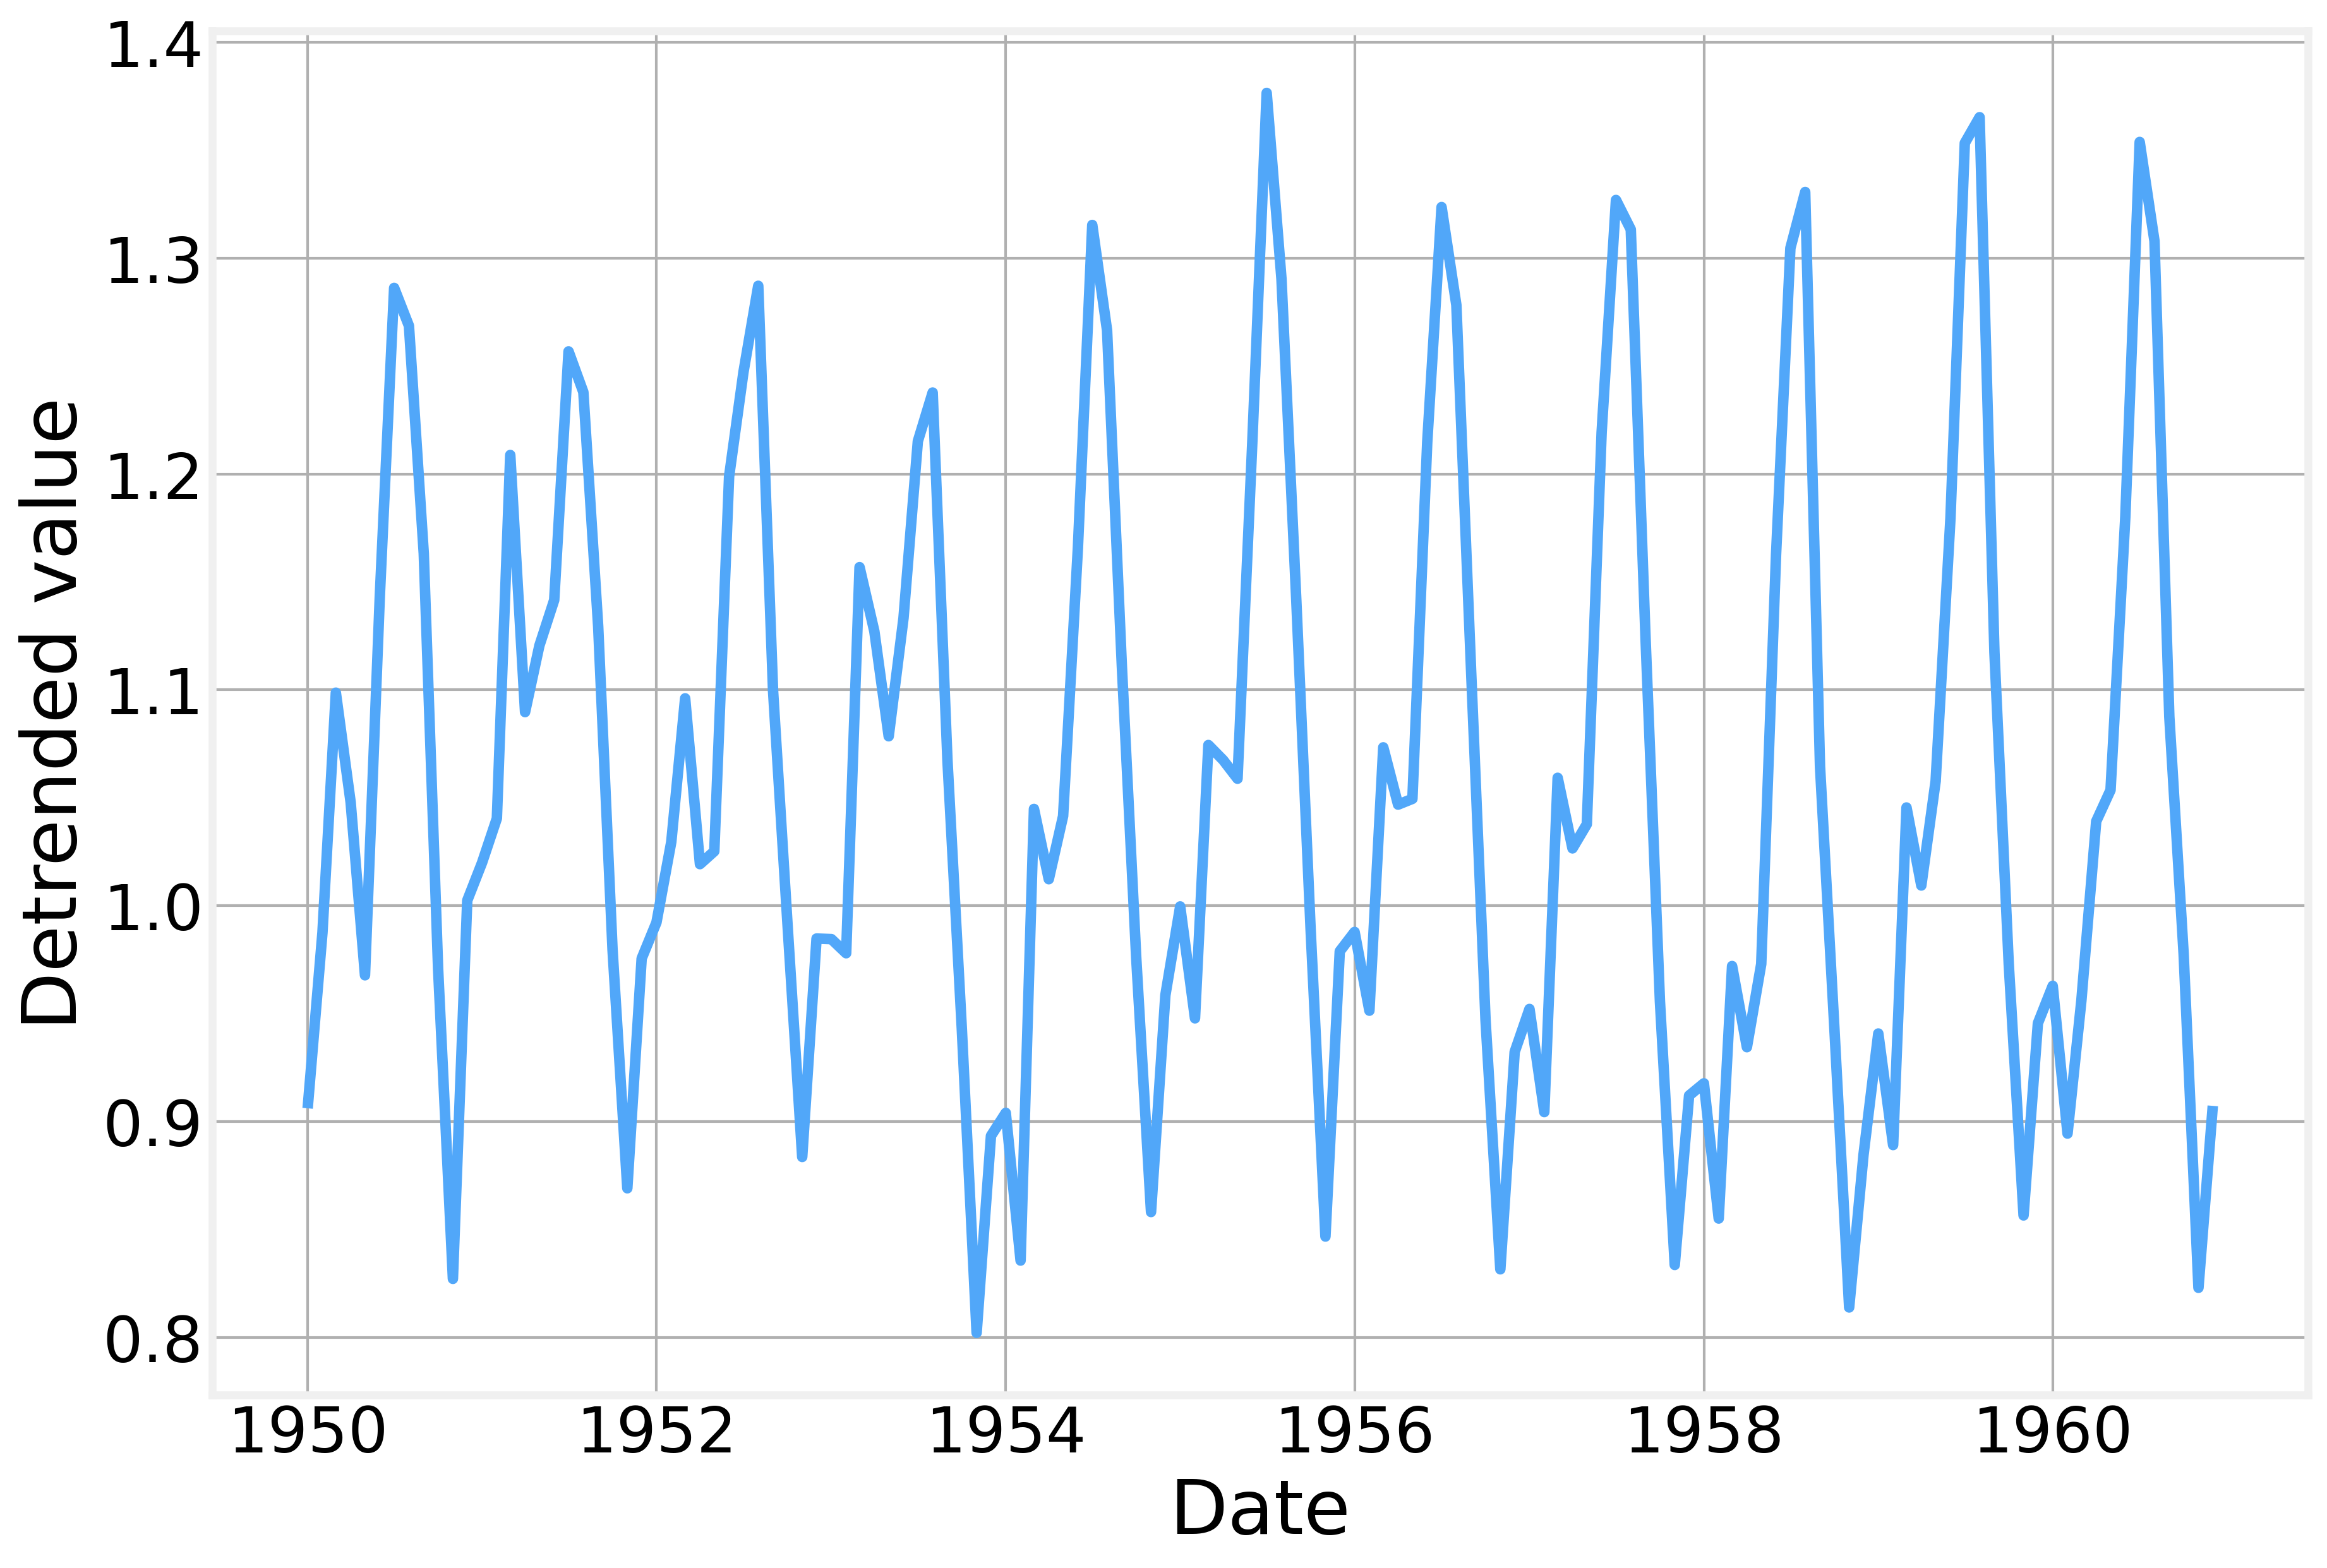

In [8]:
fig,ax = plt.subplots(1,1)
ax.plot(air.index[12:],detrended)
ax.set_xlabel("Date")
ax.set_ylabel("Detrended value")

In [9]:
detrended

,Passengers
Month,
1950-01-01,0.906106
1950-02-01,0.987590
1950-03-01,1.098701
1950-04-01,1.047865
1950-05-01,0.967742
...,...
1960-08-01,1.307914
1960-09-01,1.087600
1960-10-01,0.977558


In [10]:
def plot_seasons(detrended,order,plot_mean= True):
    colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]
    
    N=len(detrended)
    
    data=np.array([detrended[i::order].values for i in range(order)],dtype=object)
    means=np.mean(data,axis=1)
    medians=np.median(data,axis=1)
    
    counts=[0]
    counts.extend([len(data[i]) for i in range(order)])
    counts=np.cumsum(counts)
    
    ticks=(counts[:-1]+counts[1]/2)
    
    for i in range(order):
        values=data[i, :]
        npoints=len(values)
        plt.plot(range(counts[i],counts[i+1]),values,c=colors[0])
        plt.plot(range(counts[i],counts[i+1]),np.ones(npoints)*means[i],c=colors[1])
        plt.plot(range(counts[i],counts[i+1]),np.ones(npoints)*medians[i],c=colors[2])
    plt.legend(["data","mean","median"])
    plt.xlabel("season")
    plt.ylabel("values")
    plt.xticks(ticks,np.arange(order));
    if plot_mean:
        plt.plot(ticks,means,c=colors[3])
    return means

    

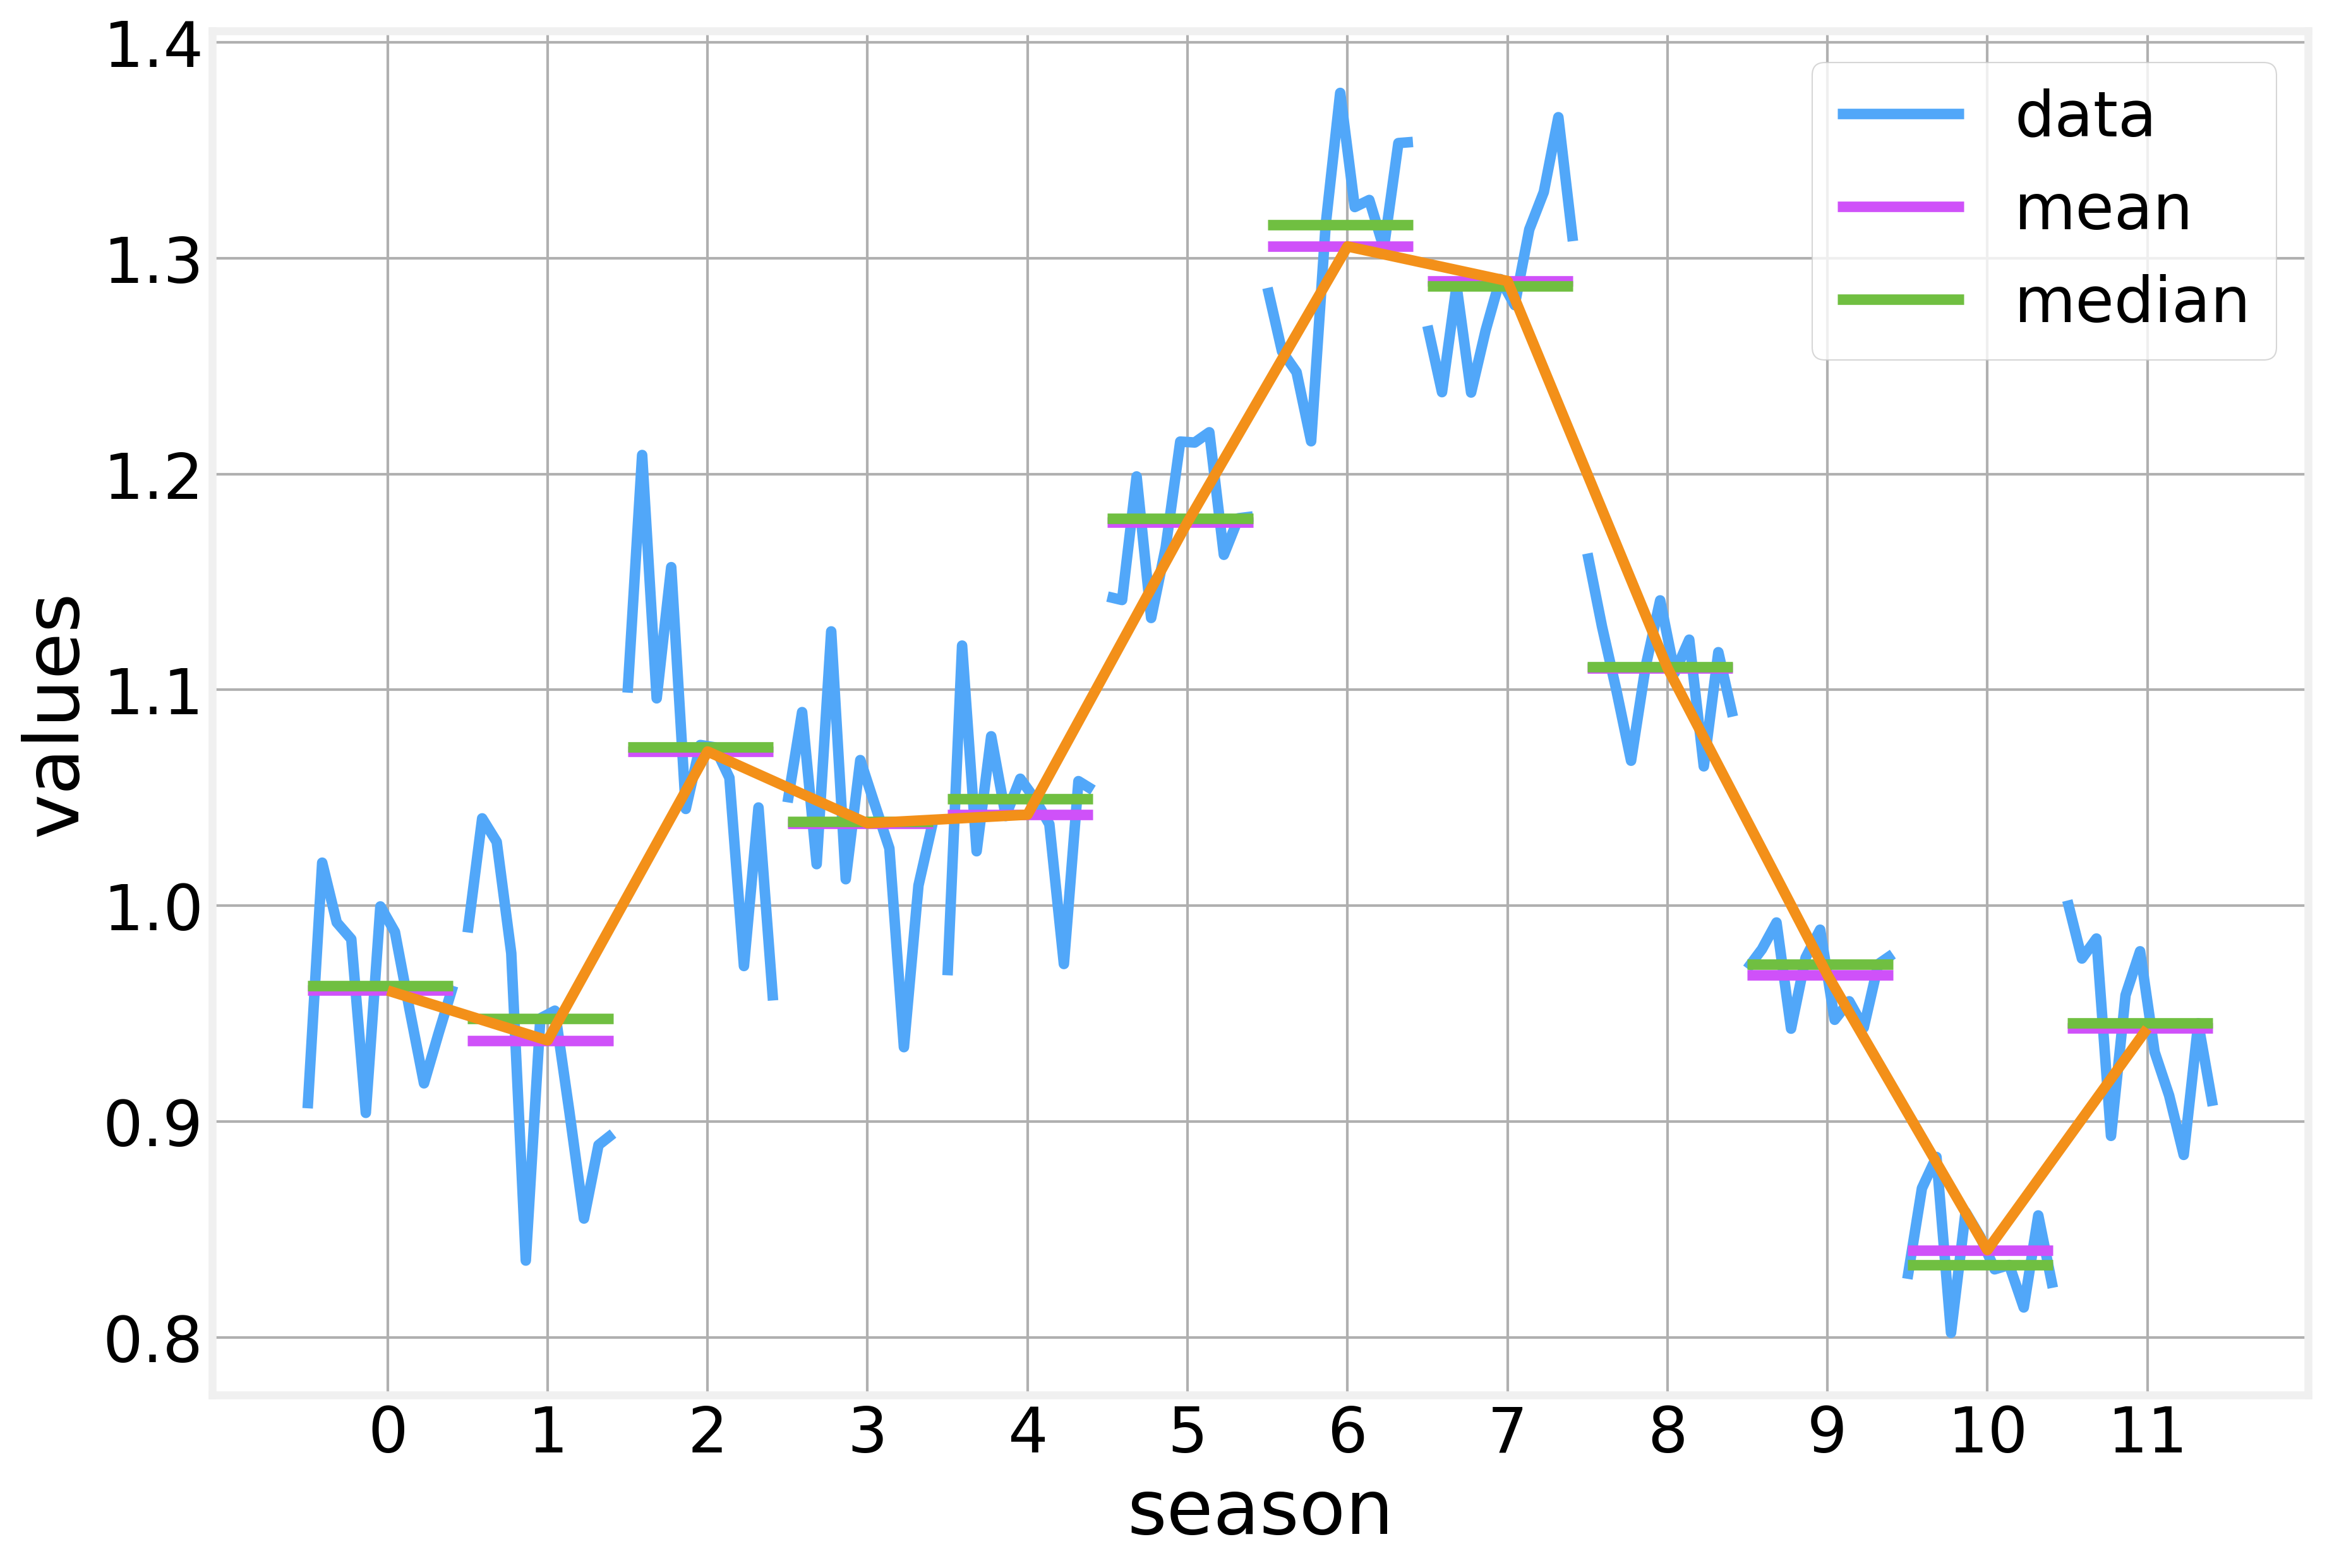

In [11]:
mean= plot_seasons(detrended,12)

In [12]:
def decomposition(data,order):
    values=data.values.flatten()
    trend=running_average(data,order)
    detrended=data[order:].div(trend)
    
    season=[detrended[i::order].mean() for i in range (order)]
    seasonality=np.array(season*(detrended.shape[0]//order+1))[:detrended.shape[0]]
    residuals=data[order:].div(trend*seasonality)
    
    return values,trend,seasonality,residuals


In [13]:
values, trend, seasonality, residuals=decomposition(air,12)

In [14]:
def plot_decomposition(values,tread,seasonality,residuals):
    fig,axs=plt.subplots(4,1,figsize=(22,16),sharex=True)
    index=air.index
    
    axs[0].plot(index,values)
    axs[0].set_title("Original data")
    
    axs[1].plot(index[12:],trend)
    axs[1].set_title("Trend")
    
    axs[2].plot(index[12:],detrended)
    axs[2].set_title("Seasonality")
    
    axs[3].plot(index[12:],residuals)
    axs[3].set_title("Residuals")
       

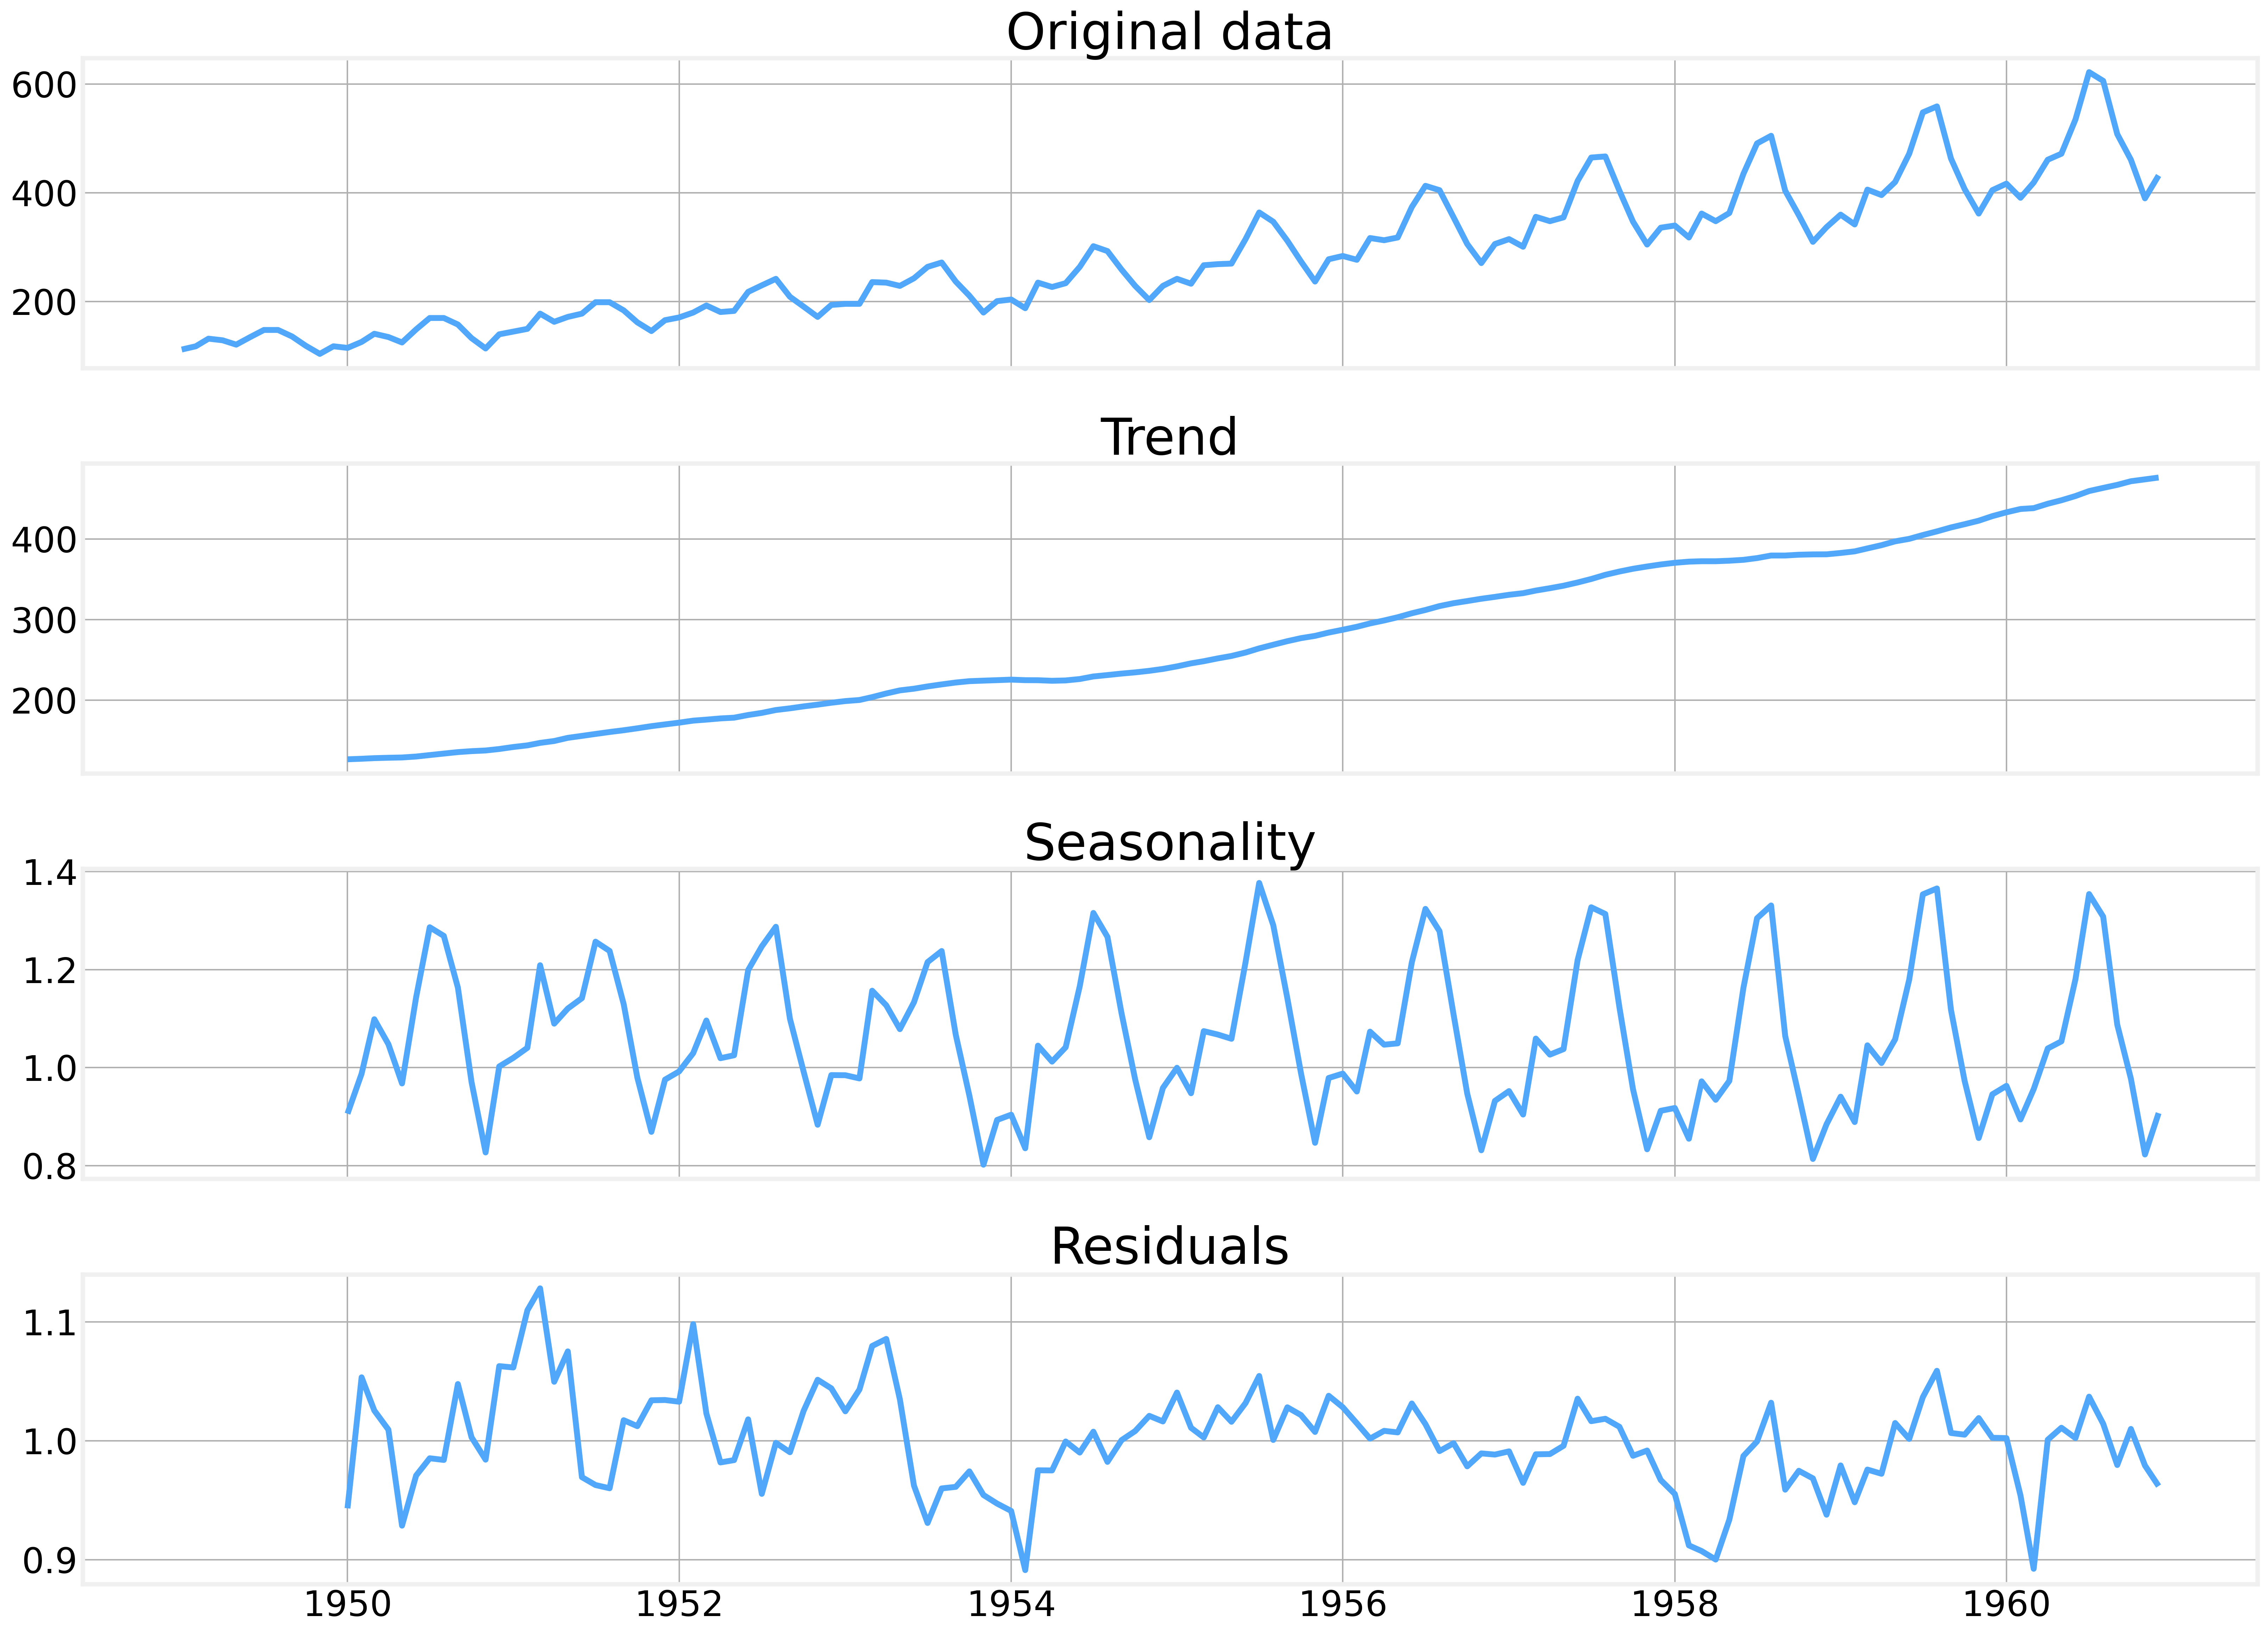

In [15]:
plot_decomposition(values,trend,seasonality,residuals)